In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings

In [64]:
#!ls ./movielens
#movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies =pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
counts = movies['genres'].value_counts()
counts

Drama                                                     4520
Comedy                                                    2294
Documentary                                               1942
Comedy|Drama                                              1264
Drama|Romance                                             1075
Comedy|Romance                                             757
Comedy|Drama|Romance                                       605
Horror                                                     565
Crime|Drama                                                448
Drama|Thriller                                             426
Drama|War                                                  399
Horror|Thriller                                            374
Crime|Drama|Thriller                                       304
Thriller                                                   268
(no genres listed)                                         246
Western                                                

In [65]:
movies['year']=movies['title'].str.extract('[(](\d\d\d\d)[)]', expand=True)
comedy=movies[movies['genres'].str.contains('Comedy',na=False)]
documentary=movies[movies['genres'].str.contains('Documentary',na=False)]
drama=movies[movies['genres'].str.contains('Drama',na=False)]
horror_crime=movies[movies['genres'].str.contains('Crime','Horror',na=False)]

In [12]:
drama

,movieId,title,genres,year
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
10,11,"American President, The (1995)",Comedy|Drama|Romance,1995
13,14,Nixon (1995),Drama,1995
15,16,Casino (1995),Crime|Drama,1995
16,17,Sense and Sensibility (1995),Drama|Romance,1995
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,1995
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,1995
23,24,Powder (1995),Drama|Sci-Fi,1995
24,25,Leaving Las Vegas (1995),Drama|Romance,1995
25,26,Othello (1995),Drama,1995


In [13]:
print(len(movies))
print(len(comedy))
print(len(documentary))
print(len(drama))
print(len(horror_crime))


27278
8374
2471
13344
2939


In [66]:
ratings = pd.read_csv("ratings.csv")

In [67]:
ratings.head()
#x=ratings['movieId'].unique().tolist()
#len(x)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
outer_movies=pd.merge(movies,ratings,left_on='movieId',right_on='movieId',how ='outer')
im=inner_movies['movieId'].unique().tolist()
len(im)

8749

In [148]:
inner_movies=pd.merge(movies,ratings,left_on='movieId',right_on='movieId',how ='inner')
inner_comedy = pd.merge( comedy,ratings,left_on='movieId',right_on='movieId', how='inner')
inner_horror_crime=pd.merge( horror_crime,ratings,left_on='movieId',right_on='movieId', how='inner')
inner_drama=pd.merge( drama,ratings,left_on='movieId',right_on='movieId', how='inner')
inner_documentary=pd.merge( documentary,ratings,left_on='movieId',right_on='movieId', how='inner')


In [139]:
inner_comedy

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,31,5.0,850466616


C:\Users\LATHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


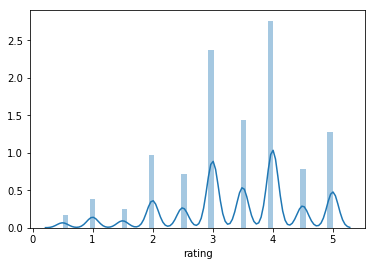

In [27]:
sns.distplot(inner_comedy["rating"])

#inner_year=inner.groupby('year')
#inner_year1=inner_year.count()
#inner_year1

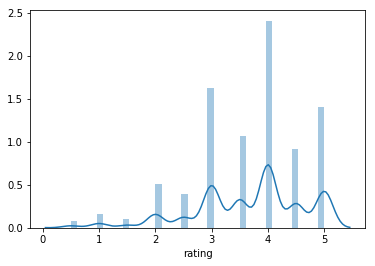

In [29]:
sns.distplot(inner_horror_crime["rating"])

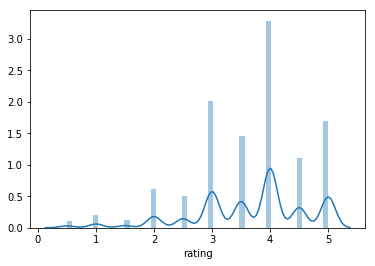

In [30]:
sns.distplot(inner_drama["rating"])

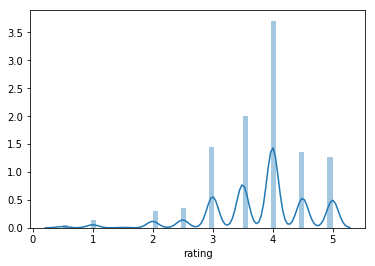

In [32]:
sns.distplot(inner_documentary["rating"])

In [210]:
df=inner_drama.groupby(["genres"])["rating"].aggregate(["min","max", "count"])
df

,min,max,count
genres,,,
Action|Adventure|Animation|Comedy|Drama|Fantasy|Romance,0.5,5.0,14
Action|Adventure|Animation|Drama,0.5,5.0,149
Action|Adventure|Animation|Drama|Fantasy,0.5,5.0,10006
Action|Adventure|Animation|Drama|Sci-Fi,1.5,4.0,8
Action|Adventure|Children|Drama,0.5,5.0,3683
Action|Adventure|Comedy|Crime|Drama,0.5,5.0,372
Action|Adventure|Comedy|Crime|Drama|Film-Noir|Horror|Mystery|Thriller|Western,0.5,5.0,154
Action|Adventure|Comedy|Crime|Drama|Thriller,3.0,3.0,1
Action|Adventure|Comedy|Drama,0.5,5.0,162


In [150]:
df1=df[df['max']==5]


min  max  count
year genres                                                      
1896 Documentary                                  5.0  5.0      1
1898 (no genres listed)                           3.0  5.0      3
1901 Documentary                                  5.0  5.0      1
1918 Comedy                                       4.0  5.0      2
1924 Drama                                        2.5  5.0      5
1925 Comedy                                       1.5  5.0      3
     Crime|Drama|Romance                          3.0  5.0      2
1926 Comedy|War                                   5.0  5.0      1
1927 Drama|Horror                                 5.0  5.0      1
     Drama|Horror|Romance                         5.0  5.0      1
1928 Comedy                                       0.5  5.0      5
     Comedy|Drama|Romance                         2.0  5.0      4
     Drama                                        2.5  5.0     12
     Drama|Mystery                                5.0  5.0      1
     Drama|Romance                                2.0  5.0      4
1930 Action|Drama|War                             4.0  5.0      2
     Adventure|Crime|Drama|Romance|Thriller       5.0  5.0      1
     Adventure|Romance|Western                    5.0  5.0      1
     Comedy|Drama|Romance                         3.0  5.0      3
     Comedy|Romance                               1.5  5.0      3
     Crime|Drama                                  0.5  5.0      2
1931 Comedy|Drama|Romance                         2.0  5.0      4
     Drama                                        2.5  5.0     15
1932 Crime|Drama|Horror                           5.0  5.0      1
     Crime|Drama|Romance                          3.5  5.0      2
     Drama|Romance                                2.5  5.0      9
     Fantasy|Horror                               5.0  5.0      1
     Horror                                       0.5  5.0      2
1933 Adventure|Comedy|Drama                       5.0  5.0      1
     Comedy|Musical|War                           5.0  5.0      1
...                                               ...  ...    ...
2013 Comedy|Romance                               0.5  5.0     23
     Crime|Drama|Film-Noir|Thriller               5.0  5.0      1
     Documentary                                  0.5  5.0    149
     Drama                                        0.5  5.0    152
     Drama|Musical|Romance                        4.0  5.0      2
     Drama|Romance|Sci-Fi                         5.0  5.0      1
     Drama|War                                    3.5  5.0      4
     Horror|Mystery|Thriller                      1.0  5.0      5
     Romance|Sci-Fi|Thriller                      5.0  5.0      1
     Sci-Fi                                       4.0  5.0      2
     Thriller                                     0.5  5.0     20
2014 Action|Adventure|Animation|Fantasy|Sci-Fi    5.0  5.0      1
     Action|Comedy                                2.5  5.0      3
     Action|War                                   5.0  5.0      1
     Adventure|Animation|Children|Comedy|Fantasy  5.0  5.0      1
     Adventure|Fantasy                            3.5  5.0      2
     Comedy                                       0.5  5.0     74
     Comedy|Drama                                 0.5  5.0     30
     Comedy|Horror                                1.5  5.0      6
     Comedy|Romance                               1.5  5.0     23
     Crime|Drama|Thriller                         2.0  5.0      9
     Documentary                                  0.5  5.0     69
     Drama                                        0.5  5.0    110
     Drama|Musical                                4.0  5.0      2
     Drama|Romance                                1.0  5.0     16
     Drama|Thriller                               1.0  5.0     12
     Horror|Thriller                              0.5  5.0     16
     Sci-Fi|IMAX                                  5.0  5.0      1
     Sci-Fi|Thriller    

---

In [70]:
outer_movies

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17.0,4.5,1.305696e+09
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,18.0,3.5,1.455210e+09
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,19.0,4.0,9.657056e+08
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,21.0,3.5,1.407619e+09
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,27.0,3.0,9.626853e+08
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,31.0,5.0,8.504666e+08


In [140]:
inner_movies

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,31,5.0,850466616


(array([ 1302.,  2736.,  1685.,  7383.,  5354., 19695., 12718., 26216.,
         8201., 12890.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

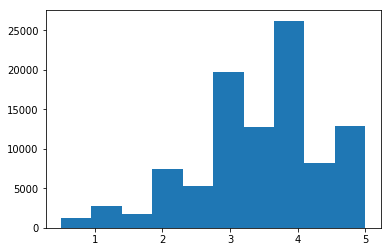

In [73]:
plt.hist(inner_movies["rating"])
##(27000/98180) * 100 = 27.5 %
## More than 1/4 th of the viewers gave 4 rating 

In [142]:
genres_counts = inner_movies["genres"].value_counts()
genres_counts

Comedy                                               6973
Drama                                                6130
Comedy|Romance                                       3934
Comedy|Drama                                         2995
Comedy|Drama|Romance                                 2966
Drama|Romance                                        2623
Crime|Drama                                          2273
Action|Adventure|Sci-Fi                              2213
Action|Crime|Thriller                                1527
Action|Adventure|Thriller                            1435
Drama|Thriller                                       1389
Action|Adventure|Sci-Fi|Thriller                     1350
Action|Sci-Fi|Thriller                               1162
Comedy|Crime                                         1159
Crime|Drama|Thriller                                 1107
Drama|War                                            1029
Action|Drama|War                                     1027
Action|Crime|D

In [118]:
inner_movies[["genres", "year", "rating"]].sort_values(["year"], ascending=False).head(55)

,genres,year,rating
97906,Action|Adventure|Comedy|Crime,2015,4.0
98028,Comedy,2015,2.0
98042,Comedy|Drama|Romance,2015,2.0
98041,Comedy,2015,5.0
98040,Comedy,2015,5.0
98039,Comedy,2015,3.0
98038,Comedy,2015,4.5
98037,Sci-Fi|Thriller,2015,5.0
98036,Sci-Fi|Thriller,2015,2.5
98035,Sci-Fi|Thriller,2015,3.5


Function to segregate the years

In [224]:
def new_mid_old(year):
    if year >= 2000 and year < 2016:
        return "Recent"
    elif year >= 1975 and year < 1999:
        return "New"
    elif year >= 1947 and year < 1974:
        return "Middle"
    elif year >= 1925 and year < 1946:
        return "Old"
    elif year >= 1900 and year < 1924:
        return "Very Old"
    else:
        None

In [225]:
new_mid_old(1964)

'Middle'

In [223]:
inner_movies = inner_movies.dropna()

In [226]:
inner_movies.year= inner_movies.year.astype(int)

C:\Users\LATHA\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [230]:
inner_movies["movie_category"] = inner_movies["year"].map(new_mid_old)

C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [232]:
inner_movies["movie_category"].mode()

0    New
dtype: object

Function to segregate the rating

In [235]:
def rating_movies(rating):
    if rating <= 5 and rating >= 4.1:
        return "Excellent"
    elif rating <= 4 and rating >= 3.1:
        return "Good"
    elif rating <= 3 and rating >= 2.1:
        return "Not Bad"
    elif rating <= 2:
        return "Bad"
    else:
        None

In [219]:
rating_movies(5)

'Excellent'

In [237]:
inner_movies["rating_category"] = inner_movies["rating"].map(rating_movies)
inner_movies.head(5)

C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,movieId,title,genres,year,userId,rating,timestamp,movie_category,rating_category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703,New,Good
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962,New,Good
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946,New,Excellent
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970,New,Not Bad
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483,New,Excellent


In [238]:
inner_movies["rating_category"].describe()

count     96201
unique        4
top        Good
freq      38156
Name: rating_category, dtype: object

C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of movies')

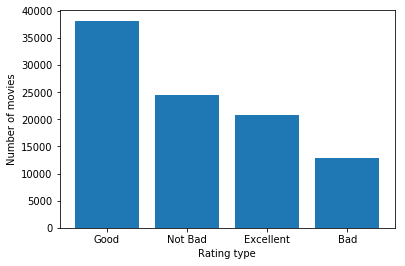

In [286]:
inner_movies_counts = inner_movies["rating_category"].value_counts()
inner_movies_counts
inner_movies_counts_df = inner_movies_counts.reset_index()
inner_movies_arrray = inner_movies_counts_df[["index"]].as_matrix().ravel()
inner_movies_arrray
inner_movies_counts_array = inner_movies_counts_df[["rating_category"]].as_matrix().ravel()

x = np.arange(inner_movies_counts_df.shape[0])
plt.bar(x, inner_movies_counts_array)
plt.xticks(x, inner_movies_arrray)
plt.xlabel("Rating type")
plt.ylabel("Number of movies")

([<matplotlib.patches.Wedge at 0x1c17a9bd748>,
 [Text(0.35098219847251755, 1.0425025162345645, 'Good'),
  Text(-1.0876656650037384, -0.16426625086114288, 'Not Bad'),
  Text(0.06141309152232063, -1.098284313003546, 'Excellent'),
  Text(1.004940957427268, -0.4473183118151616, 'Bad')])

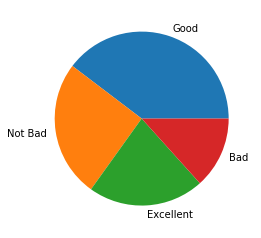

In [287]:
plt.pie(inner_movies_counts_array, labels=inner_movies_arrray)

C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of movies')

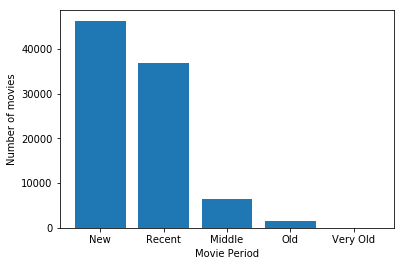

In [284]:
inner_movies_counts = inner_movies["movie_category"].value_counts()
inner_movies_counts
inner_movies_counts_df = inner_movies_counts.reset_index()
inner_movies_arrray = inner_movies_counts_df[["index"]].as_matrix().ravel()
inner_movies_arrray
inner_movies_counts_array = inner_movies_counts_df[["movie_category"]].as_matrix().ravel()

x = np.arange(inner_movies_counts_df.shape[0])
plt.bar(x, inner_movies_counts_array)
plt.xticks(x, inner_movies_arrray)
plt.xlabel("Movie Period")
plt.ylabel("Number of movies")

([<matplotlib.patches.Wedge at 0x1c17c1e2048>,
 [Text(-0.030412199407091806, 1.0995795096886916, 'New'),
  Text(-0.2686107945483944, -1.0666996958151251, 'Recent'),
  Text(1.041130872016787, -0.3550302907268126, 'Middle'),
  Text(1.0982718840866847, -0.06163496268096375, 'Old'),
  Text(1.099998297206834, -0.0019354953024778485, 'Very Old')])

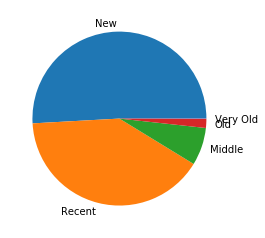

In [285]:
plt.pie(inner_movies_counts_array, labels=inner_movies_arrray)

In [241]:
inner_movies_counts = inner_movies["rating_category"].value_counts()
inner_movies_counts

Good         38156
Not Bad      24479
Excellent    20742
Bad          12824
Name: rating_category, dtype: int64

In [281]:
inner_movies_counts = inner_movies["movie_category"].value_counts()
inner_movies_counts

New         46333
Recent      36778
Middle       6378
Old          1523
Very Old       51
Name: movie_category, dtype: int64

In [273]:
Good_Recent = inner_movies[((inner_movies.rating_category == "Good") & (inner_movies.movie_category == "Recent"))]
Good_Recent.genres.describe()

count     15699
unique      527
top       Drama
freq       1064
Name: genres, dtype: object

In [265]:
Bad_Recent = inner_movies[((inner_movies.rating_category == "Bad") & (inner_movies.movie_category == "Recent"))]
Bad_Recent.genres.describe()

count       4628
unique       431
top       Comedy
freq         510
Name: genres, dtype: object

In [268]:
Excellent_Recent = inner_movies[((inner_movies.rating_category == "Excellent") & (inner_movies.movie_category == "Recent"))]
Excellent_Recent.genres.describe()

count      7620
unique      413
top       Drama
freq        440
Name: genres, dtype: object

In [264]:
Good_New = inner_movies[((inner_movies.rating_category == "Good") & (inner_movies.movie_category == "New"))]
Good_New.genres.describe()

count      16953
unique       399
top       Comedy
freq        1333
Name: genres, dtype: object

In [266]:
Bad_New = inner_movies[((inner_movies.rating_category == "Bad") & (inner_movies.movie_category == "New"))]
Bad_New.genres.describe()

count       6939
unique       369
top       Comedy
freq         902
Name: genres, dtype: object

In [267]:
Excellent_New = inner_movies[((inner_movies.rating_category == "Excellent") & (inner_movies.movie_category == "New"))]
Excellent_New.genres.describe()

count      9511
unique      332
top       Drama
freq        696
Name: genres, dtype: object

In [314]:
Good_VeryOld = inner_movies[((inner_movies.rating_category == "Good") & (inner_movies.movie_category == "Very Old"))]
Good_VeryOld.genres.describe()

count         25
unique         9
top       Horror
freq           9
Name: genres, dtype: object

In [315]:
Bad_VeryOld = inner_movies[((inner_movies.rating_category == "Bad") & (inner_movies.movie_category == "Very Old"))]
Bad_VeryOld.genres.describe()

count             4
unique            4
top       Drama|War
freq              1
Name: genres, dtype: object

In [271]:
Excellent_VeryOld = inner_movies[((inner_movies.rating_category == "Excellent") & (inner_movies.movie_category == "Very Old"))]
Excellent_VeryOld.genres.describe()

count                        9
unique                       7
top       Crime|Fantasy|Horror
freq                         2
Name: genres, dtype: object

In [289]:
Good_Middle = inner_movies[((inner_movies.rating_category == "Good") & (inner_movies.movie_category == "Middle"))]
Good_Middle.genres.describe()

count      2775
unique      200
top       Drama
freq        291
Name: genres, dtype: object

In [290]:
Bad_Middle = inner_movies[((inner_movies.rating_category == "Bad") & (inner_movies.movie_category == "Middle"))]
Bad_Middle.genres.describe()

count               404
unique              116
top       Action|Sci-Fi
freq                 24
Name: genres, dtype: object

In [291]:
Excellent_Middle = inner_movies[((inner_movies.rating_category == "Excellent") & (inner_movies.movie_category == "Middle"))]
Excellent_Middle.genres.describe()

count      1907
unique      155
top       Drama
freq        230
Name: genres, dtype: object

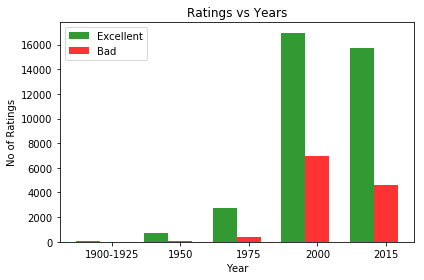

In [312]:
n_groups = 5
Good = (25,695,2775,16953,15699)
Bad = (4,99,404,6939,4628)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, Good, bar_width,
alpha=opacity,
color='g',
label='Excellent')
 
rects2 = plt.bar(index + bar_width, Bad, bar_width,
alpha=opacity,
color='r',
label='Bad')
 
plt.xlabel('Year')
plt.ylabel('No of Ratings')
plt.title('Ratings vs Years')
plt.xticks(index + bar_width, ('1900-1925', '1950', '1975', '2000', '2015'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [316]:
data = [['1900-1925', 'Horror', 'Drama|War'], ['1925-1950', 'Drama|Romance','Animation|Children|Fantasy|Musical'], 
        ['1950-1975', 'Drama','Action|Sci-Fi'], ['1975-2000', 'Comedy','Comedy'], ['2000-2015','Drama','Comedy']]

In [317]:
dataframe = pd.DataFrame(data, columns = ['Year', 'Excellent Rated', 'Bad Rated']) 
dataframe

,Year,Excellent Rated,Bad Rated
0,1900-1925,Horror,Drama|War
1,1925-1950,Drama|Romance,Animation|Children|Fantasy|Musical
2,1950-1975,Drama,Action|Sci-Fi
3,1975-2000,Comedy,Comedy
4,2000-2015,Drama,Comedy
